In [1]:
import warnings
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import xdggs

warnings.filterwarnings("ignore")
xr.set_options(display_max_rows=27)

In [2]:
dtotal=xr.open_zarr("/home/jovyan/Akathon-Geilo/odysea.zarr").pipe(xdggs.decode)
dtotal

<xarray.Dataset> Size: 74GB
Dimensions:               (cells: 3145728, orbit: 113)
Coordinates:
  * cell_ids              (cells) int64 25MB dask.array<chunksize=(1048576,), meta=np.ndarray>
  * orbit                 (orbit) int64 904B 161 162 163 164 ... 270 271 272 273
Dimensions without coordinates: cells
Data variables:
    azimuth_aft           (cells, orbit) float64 3GB dask.array<chunksize=(1048576, 1), meta=np.ndarray>
    azimuth_fore          (cells, orbit) float64 3GB dask.array<chunksize=(1048576, 1), meta=np.ndarray>
    encoder_aft           (cells, orbit) float64 3GB dask.array<chunksize=(1048576, 1), meta=np.ndarray>
    encoder_fore          (cells, orbit) float64 3GB dask.array<chunksize=(1048576, 1), meta=np.ndarray>
    hit                   (cells, orbit) float64 3GB dask.array<chunksize=(1048576, 1), meta=np.ndarray>
    lat                   (cells, orbit) float64 3GB dask.array<chunksize=(1048576, 1), meta=np.ndarray>
    lon                   (cells, orbit) float64 3GB dask.array<chunksize=(1048576, 1), meta=np.ndarray>
    radial_angle_aft      (cells, orbit) float64 3GB dask.array<chunksize=(1048576, 1), meta=np.ndarray>
    radial_angle_fore     (cells, orbit) float64 3GB dask.array<chunksize=(1048576, 1), meta=np.ndarray>
    sample_time           (cells, orbit) float64 3GB dask.array<chunksize=(1048576, 1), meta=np.ndarray>
    u_model               (cells, orbit) float64 3GB dask.array<chunksize=(1048576, 1), meta=np.ndarray>
    ur_ac                 (cells, orbit) float64 3GB dask.array<chunksize=(1048576, 1), meta=np.ndarray>
    ur_aft                (cells, orbit) float64 3GB dask.array<chunksize=(1048576, 1), meta=np.ndarray>
    ur_al                 (cells, orbit) float64 3GB dask.array<chunksize=(1048576, 1), meta=np.ndarray>
    ur_eastward           (cells, orbit) float64 3GB dask.array<chunksize=(1048576, 1), meta=np.ndarray>
    ur_fore               (cells, orbit) float64 3GB dask.array<chunksize=(1048576, 1), meta=np.ndarray>
    ur_nonoise_ac         (cells, orbit) float64 3GB dask.array<chunksize=(1048576, 1), meta=np.ndarray>
    ur_nonoise_aft        (cells, orbit) float64 3GB dask.array<chunksize=(1048576, 1), meta=np.ndarray>
    ur_nonoise_al         (cells, orbit) float64 3GB dask.array<chunksize=(1048576, 1), meta=np.ndarray>
    ur_nonoise_eastward   (cells, orbit) float64 3GB dask.array<chunksize=(1048576, 1), meta=np.ndarray>
    ur_nonoise_fore       (cells, orbit) float64 3GB dask.array<chunksize=(1048576, 1), meta=np.ndarray>
    ur_nonoise_northward  (cells, orbit) float64 3GB dask.array<chunksize=(1048576, 1), meta=np.ndarray>
    ur_northward          (cells, orbit) float64 3GB dask.array<chunksize=(1048576, 1), meta=np.ndarray>
    v_model               (cells, orbit) float64 3GB dask.array<chunksize=(1048576, 1), meta=np.ndarray>
    wind_dir              (cells, orbit) float64 3GB dask.array<chunksize=(1048576, 1), meta=np.ndarray>
    wind_speed            (cells, orbit) float64 3GB dask.array<chunksize=(1048576, 1), meta=np.ndarray>
Indexes:
    cell_ids  HealpixIndex(nside=9, indexing_scheme=nested)

In [59]:
dtotal.u_model.isel(orbit=0).where(lambda x : x!=hp.UNSEEN).compute().dggs.explore(alpha=0.8)
#dtotal.u_model.where(lambda x : x!=hp.UNSEEN).mean("orbit").compute().dggs.explore(cmap='jet',alpha=0.8)

Map(layers=[SolidPolygonLayer(filled=True, get_fill_color=<pyarrow.lib.FixedSizeListArray object at 0x7e17af21…

In [77]:

lat = np.arange(50, 70, 0.1)
lon = np.arange(4, 15, 0.1)
full_lat = np.repeat(lat, len(lon))
full_lon = np.tile(lon, len(lat))
ds=dtotal.u_model.dggs.sel_latlon(longitude=full_lon, latitude=full_lat).where(lambda x : x!=hp.UNSEEN).mean(dim="orbit").compute()#.dggs.explore(alpha=0.8)
ds.dggs.explore(alpha=0.8)
#dtotal.u_model.where(lambda x : x!=hp.UNSEEN).mean("orbit").compute().dggs.explore(cmap='jet',alpha=0.8)

Map(layers=[SolidPolygonLayer(filled=True, get_fill_color=<pyarrow.lib.FixedSizeListArray object at 0x7e17a106…

In [97]:

lat = np.arange(40, 70, 0.03)
lon = np.arange(-10, 15, 0.03)
full_lat = np.repeat(lat, len(lon))
full_lon = np.tile(lon, len(lat))

ds=np.sqrt(dtotal.u_model.where(lambda x : x!=hp.UNSEEN)**2+dtotal.v_model.where(lambda x : x!=hp.UNSEEN)**2).dggs.sel_latlon(longitude=full_lon, latitude=full_lat).isel(orbit=12).compute()
ds.dggs.explore(alpha=0.8,cmap='coolwarm')

Map(layers=[SolidPolygonLayer(filled=True, get_fill_color=<pyarrow.lib.FixedSizeListArray object at 0x7e17ad97…

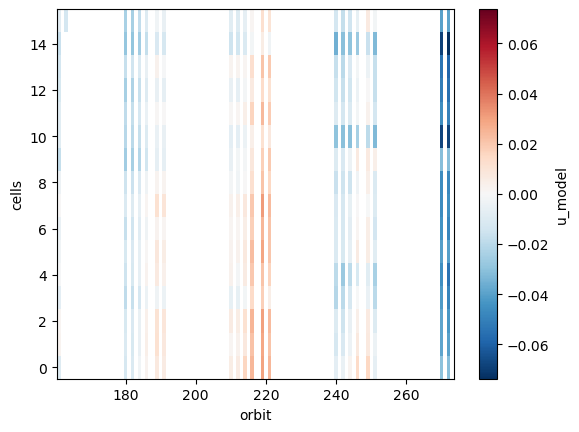

In [10]:
dtotal.u_model.isel(cells=[517521+k for k in range(16)]).where(lambda x : x!=hp.UNSEEN).compute().plot()

In [28]:
lat = np.arange(48.5, 49, 0.01)
lon = np.arange(-4, 3, 0.01)
full_lat = np.repeat(lat, len(lon))
full_lon = np.tile(lon, len(lat))
ds=dtotal.dggs.sel_latlon(longitude=full_lon, latitude=full_lat).where(lambda x : x!=hp.UNSEEN)

In [29]:
ds.u_model

<xarray.DataArray 'u_model' (cells: 35000, orbit: 113)> Size: 32MB
dask.array<where, shape=(35000, 113), dtype=float64, chunksize=(35000, 1), chunktype=numpy.ndarray>
Coordinates:
  * cell_ids  (cells) int64 280kB dask.array<chunksize=(35000,), meta=np.ndarray>
  * orbit     (orbit) int64 904B 161 162 163 164 165 166 ... 269 270 271 272 273
Dimensions without coordinates: cells
Indexes:
    cell_ids  HealpixIndex(nside=9, indexing_scheme=nested)

In [58]:
#ds.u_model.isel(orbit=0).pipe(xdggs.decode).dggs.explore(
#    center=0, cmap="viridis", alpha=0.8
#)
ds.u_model.isel(orbit=12).dggs.explore(center=0, cmap="viridis", alpha=0.8)

TypeError: argument 'ipix': 'Array' object cannot be converted to 'PyArray<T, D>'